# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [11]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [12]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [13]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [14]:
heroes_df.drop("Unnamed: 0", axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [15]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [16]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [20]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [23]:
heroes_df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [28]:
heroes_df.loc[heroes_df['Publisher'].isna()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [34]:
(heroes_df == '-').sum()

name            0
Gender         29
Eye color     172
Race          304
Hair color    172
Height          0
Publisher       0
Skin color    662
Alignment       7
Weight          0
dtype: int64

In [47]:
heroes_df.loc[heroes_df['Alignment'] == '-']

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
33,Anti-Venom,Male,blue,Blond,229.0,Marvel Comics,-,358.0
110,Blackwulf,Male,red,White,188.0,Marvel Comics,-,88.0
138,Brundlefly,Male,-,-,193.0,NaN,-,-99.0
426,Man of Miracles,-,blue,Silver,-99.0,Image Comics,-,-99.0
535,Q,Male,-,-,-99.0,Star Trek,-,-99.0
676,Trickster,Male,blue,Blond,183.0,DC Comics,-,81.0
692,Venompool,Male,-,-,226.0,Marvel Comics,-,-99.0


In [48]:
(heroes_df == -99.0).sum()

name            0
Gender          0
Eye color       0
Hair color      0
Height        217
Publisher       0
Alignment       0
Weight        237
dtype: int64

In [53]:
H_heroes = heroes_df.loc[(heroes_df['Height'] != -99.0)]['Height']
W_heroes = heroes_df.loc[(heroes_df['Weight'] != -99.0)]['Weight']

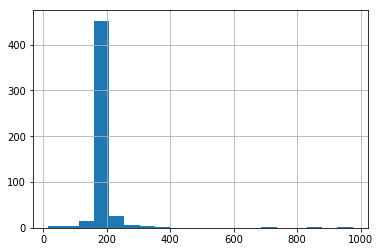

In [57]:
H_heroes.hist(bins=20)

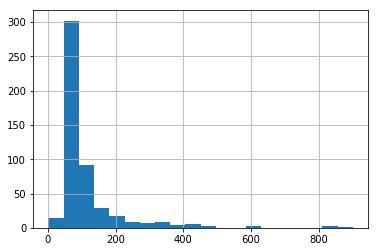

In [58]:
W_heroes.hist(bins=20)

In [59]:
H_fill = H_heroes.median()
W_fill = W_heroes.median()

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

It seems that most missing values in heroes_df are denoted as '-'. The Skin color and Race columns are mostly denoted as '-'. For this reason, I will drop these columns. Otherwise, I will leave all other columns of heroes_df intact, and attempt to fill in the unknown values with more descriptive terms.

Furthermore, it seems that numeric columns have unknown values listed as -99.0. To combat this, we can use medians to fill since our histograms show a right-skewed, yet median dominant distribution.

As for string data, it does not make sense to get rid of Hair color or Eye color, since certain heroes may not have hair or eyes! Therefore, leaving these unknowns as '-' will help us with type casting, but also signal that these values may not apply to the given hero.

Lastly, Gender, Alignment, and Publisher columns have a small amount of '-' values, but similarly, certain heroes may not have a gender, alignment, or a distinct publisher, so we will keep these rows to preserve this information.

In [35]:
heroes_df.drop(['Skin color', 'Race'], axis=1, inplace=True)

In [86]:
heroes_df.loc[heroes_df['Height'] == -99.0, 'Height'] = H_fill
heroes_df.loc[heroes_df['Weight'] == -99.0, 'Weight'] = W_fill
heroes_df.loc[heroes_df['Weight'].isna(), 'Weight'] = W_fill

In [64]:
heroes_df.head()

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Black,183.0,Marvel Comics,bad,81.0


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [71]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)
powers_df.set_index('name', inplace=True)
heroes_df.set_index('name', inplace=True)

In [73]:
df = heroes_df.join(powers_df, how='left')
df.head()

,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Black,183.0,Marvel Comics,bad,81.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [74]:
male_df = df.loc[df['Gender'] == 'Male']
female_df = df.loc[df['Gender'] == 'Female']

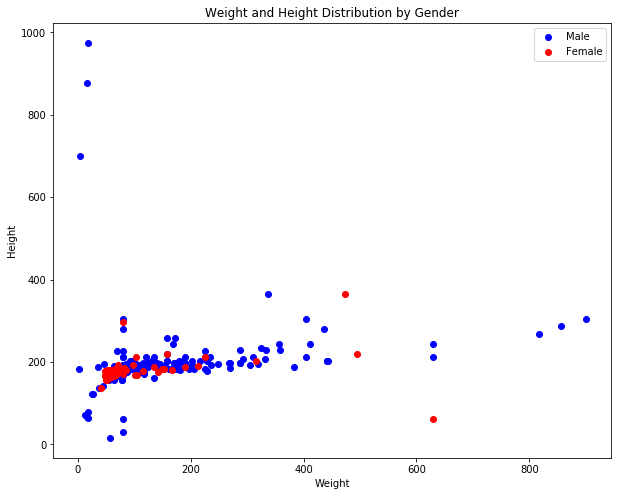

In [81]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(male_df['Weight'], male_df['Height'], color='blue', label='Male')
plt.scatter(female_df['Weight'], female_df['Height'], color='red', label='Female')
plt.title('Weight and Height Distribution by Gender')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [104]:
male_heroes_df = heroes_df.loc[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df.loc[heroes_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe.loc[(dataframe['Gender'] == gender), column_name])
    

C:\Users\rcapu\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


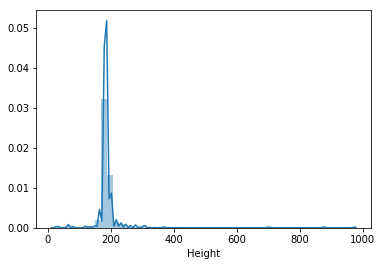

In [105]:
# Male Height
show_distplot(heroes_df, 'Male', 'Height')

C:\Users\rcapu\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


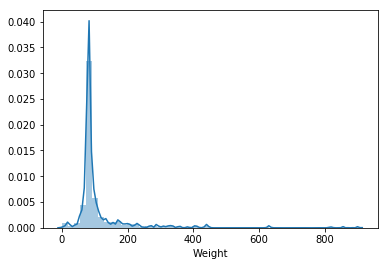

In [106]:
# Male Weight
show_distplot(heroes_df, 'Male', 'Weight')

C:\Users\rcapu\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


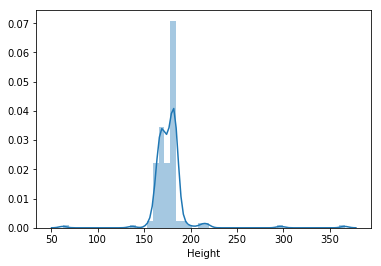

In [108]:
# Female Height
show_distplot(heroes_df, 'Female', 'Height')

C:\Users\rcapu\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


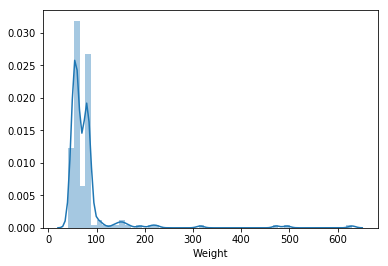

In [109]:
# Female Weight
show_distplot(heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________
Male heroes seem to have larger heights and weights overall. Additionally, male heroes tend to have more outliers on the right tail, and thus higher variance in both measurements. Female heroes tend to have two 'bumps' indicating density in two different, yet close heights and weights. Let's take a look at the summary statistics of the dataframes we made earlier:


In [111]:
male_df[['Height', 'Weight']].describe()

,Height,Weight
count,505.000000,504.000000
mean,189.362376,110.980159
std,58.070057,93.226096
min,15.200000,2.000000
25%,183.000000,81.000000
50%,183.000000,81.000000
75%,188.000000,101.000000
max,975.000000,900.000000


In [112]:
female_df[['Height', 'Weight']].describe()

,Height,Weight
count,200.000000,200.000000
mean,177.012500,79.465000
std,20.434381,64.801892
min,62.500000,41.000000
25%,168.000000,55.000000
50%,175.000000,63.000000
75%,183.000000,81.000000
max,366.000000,630.000000


Interestingly, the male_df has identical inter quartile range values, indicating that a vast majority of our heroes lie near the mean. This is due to a small number of male heroes having very extreme heights and weights. The female_df contains lower variance overall, and an IQR with more reasonable values.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [123]:
powers_df.sum().sort_values(ascending=False)[:5]

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [138]:
powers_df.reindex(heroes_df.loc[heroes_df['Publisher'] == 'Marvel Comics'].index).sum().sort_values(ascending=False)[:5]

Super Strength    204.0
Durability        154.0
Stamina           150.0
Super Speed       137.0
Agility           126.0
dtype: float64

In [137]:
powers_df.reindex(heroes_df.loc[heroes_df['Publisher'] == 'DC Comics'].index).sum().sort_values(ascending=False)[:5]

Super Strength    109.0
Stamina            90.0
Flight             86.0
Super Speed        79.0
Agility            71.0
dtype: float64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________
Marvel Comics heroes have identical top powers to the entire dataframe. DC Comics' list of top powers replaces durability with flight, but is very similar to the top powers of the entire dataframe. It seems that Marvel has a stronger weight in the entire dataframe than DC, so this makes sense.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender? 

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [213]:
# First, let's take a look at the entire powers_df and figure out the correlation of powers
corr_matrix = powers_df.corr().abs()
corr_matrix

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agility,1.000000,0.256731,0.024704,0.031677,0.096830,0.132984,0.392603,0.039646,0.019537,0.227412,...,0.107033,0.065107,0.072676,0.100934,0.051351,0.051351,0.029240,0.072676,0.015647,0.015647
Accelerated Healing,0.256731,1.000000,0.024898,0.130776,0.138495,0.239692,0.098497,0.153284,0.134115,0.228862,...,0.195400,0.149085,0.090897,0.164466,0.064225,0.023379,0.064225,0.090897,0.090897,0.090897
Lantern Power Ring,0.024704,0.024898,1.000000,0.025553,0.035653,0.005766,0.062493,0.046780,0.139143,0.028102,...,0.018961,0.020301,0.007101,0.015144,0.005018,0.005018,0.005018,0.007101,0.007101,0.007101
Dimensional Awareness,0.031677,0.130776,0.025553,1.000000,0.054332,0.042700,0.045924,0.126320,0.136529,0.033346,...,0.026170,0.536517,0.010822,0.045337,0.007647,0.007647,0.007647,0.010822,0.277908,0.277908
Cold Resistance,0.096830,0.138495,0.035653,0.054332,1.000000,0.263499,0.061680,0.047190,0.049550,0.003221,...,0.040314,0.004879,0.015099,0.018574,0.010669,0.010669,0.010669,0.015099,0.015099,0.015099
Durability,0.132984,0.239692,0.005766,0.042700,0.263499,1.000000,0.027162,0.109239,0.094707,0.110600,...,0.141960,0.023454,0.069268,0.121017,0.030679,0.030679,0.048943,0.069268,0.012924,0.012924
Stealth,0.392603,0.098497,0.062493,0.045924,0.061680,0.027162,1.000000,0.090442,0.132004,0.190955,...,0.116370,0.074532,0.043585,0.076350,0.018700,0.018700,0.018700,0.026466,0.026466,0.026466
Energy Absorption,0.039646,0.153284,0.046780,0.126320,0.047190,0.109239,0.090442,1.000000,0.247122,0.034787,...,0.052896,0.158000,0.065996,0.042250,0.107261,0.107261,0.107261,0.151805,0.151805,0.151805
Flight,0.019537,0.134115,0.139143,0.136529,0.049550,0.094707,0.132004,0.247122,1.000000,0.070457,...,0.077486,0.166543,0.021454,0.003891,0.056768,0.026450,0.056768,0.080342,0.021454,0.021454
Danger Sense,0.227412,0.228862,0.028102,0.033346,0.003221,0.110600,0.190955,0.034787,0.070457,1.000000,...,0.472856,0.013254,0.011901,0.413513,0.008409,0.008409,0.008409,0.011901,0.120402,0.120402


In [238]:
most_common_shared = powers_df.corr().unstack().sort_values(ascending=False).drop_duplicates()
most_common_shared[:10]

Omniscient            Omniscient           1.000000
Intuitive aptitude    Melting              0.706576
Vision - Microscopic  Vision - X-Ray       0.659125
Vision - Heat         Vision - X-Ray       0.659125
Vision - Microscopic  Vision - Heat        0.620776
                      Super Breath         0.609733
Vision - Heat         Super Breath         0.609733
Time Travel           Time Manipulation    0.608488
Heat Resistance       Cold Resistance      0.595626
Wallcrawling          Web Creation         0.584234
dtype: float64

In [242]:
male_powers = powers_df.reindex(heroes_df.loc[heroes_df['Gender'] == 'Male'].index).dropna(axis=0).astype('int64')
female_powers = powers_df.reindex(heroes_df.loc[heroes_df['Gender'] == 'Female'].index).dropna(axis=0).astype('int64')

In [243]:
male_powers

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abe Sapien,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abin Sur,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abomination,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abraxas,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Absorbing Man,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Adam Monroe,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adam Strange,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Agent Bob,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
male_powers.corr()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agility,1.000000,0.268584,0.020825,0.003650,0.159563,0.152692,0.399053,0.017364,0.000698,0.234588,...,0.114215,0.069718,0.085333,0.131101,0.060274,NaN,-0.035833,0.060274,NaN,NaN
Accelerated Healing,0.268584,1.000000,-0.023134,0.107832,0.163779,0.207192,0.066669,0.181379,0.124870,0.242399,...,0.208516,0.130708,0.101126,0.195641,0.071430,NaN,0.071430,0.071430,NaN,NaN
Lantern Power Ring,0.020825,-0.023134,1.000000,-0.030621,-0.040789,0.006273,-0.069942,-0.050505,0.136665,-0.032119,...,-0.021916,-0.020873,-0.009254,-0.020873,-0.006536,NaN,-0.006536,-0.006536,NaN,NaN
Dimensional Awareness,0.003650,0.107832,-0.030621,1.000000,-0.063145,-0.060256,0.047749,0.084788,0.137680,-0.001956,...,0.034221,0.467464,-0.014325,0.039084,-0.010119,NaN,-0.010119,-0.010119,NaN,NaN
Cold Resistance,0.159563,0.163779,-0.040789,-0.063145,1.000000,0.290202,0.057831,0.047816,-0.079884,0.007999,...,-0.045194,0.012435,-0.019082,0.012435,-0.013478,NaN,-0.013478,-0.013478,NaN,NaN
Durability,0.152692,0.207192,0.006273,-0.060256,0.290202,1.000000,0.067171,0.118133,0.061922,0.146433,...,0.153536,-0.036781,0.076937,0.143498,-0.039744,NaN,0.054344,0.054344,NaN,NaN
Stealth,0.399053,0.066669,-0.069942,0.047749,0.057831,0.067171,1.000000,-0.076619,-0.135694,0.185277,...,0.135692,0.075090,0.049792,0.112314,-0.023112,NaN,-0.023112,-0.023112,NaN,NaN
Energy Absorption,0.017364,0.181379,-0.050505,0.084788,0.047816,0.118133,-0.076619,1.000000,0.316757,0.011639,...,-0.055958,0.086680,0.079797,-0.053295,0.129417,NaN,0.129417,0.129417,NaN,NaN
Flight,0.000698,0.124870,0.136665,0.137680,-0.079884,0.061922,-0.135694,0.316757,1.000000,-0.072928,...,-0.077416,0.151268,0.024860,-0.007386,0.067240,NaN,0.067240,0.067240,NaN,NaN
Danger Sense,0.234588,0.242399,-0.032119,-0.001956,0.007999,0.146433,0.185277,0.011639,-0.072928,1.000000,...,0.551810,-0.033894,-0.015026,0.513118,-0.010613,NaN,-0.010613,-0.010613,NaN,NaN


In [245]:
female_powers.corr()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agility,1.000000,0.252910,0.028517,0.097915,-0.020848,0.101886,0.366449,0.073642,-0.051170,0.282591,...,0.197512,0.097915,NaN,NaN,NaN,0.097915,NaN,NaN,NaN,NaN
Accelerated Healing,0.252910,1.000000,-0.055538,-0.039160,0.133318,0.390405,0.130075,0.041906,0.163191,0.284033,...,0.291023,-0.039160,NaN,NaN,NaN,-0.039160,NaN,NaN,NaN,NaN
Lantern Power Ring,0.028517,-0.055538,1.000000,-0.008013,-0.028661,-0.075060,-0.055538,-0.036850,0.161537,-0.023125,...,-0.016163,-0.008013,NaN,NaN,NaN,-0.008013,NaN,NaN,NaN,NaN
Dimensional Awareness,0.097915,-0.039160,-0.008013,1.000000,-0.020209,-0.052926,-0.039160,-0.025983,0.113901,-0.016305,...,-0.011396,1.000000,NaN,NaN,NaN,-0.005650,NaN,NaN,NaN,NaN
Cold Resistance,-0.020848,0.133318,-0.028661,-0.020209,1.000000,0.239053,0.023960,0.124739,0.066262,0.049820,...,-0.040765,-0.020209,NaN,NaN,NaN,-0.020209,NaN,NaN,NaN,NaN
Durability,0.101886,0.390405,-0.075060,-0.052926,0.239053,1.000000,-0.046469,0.104441,0.184349,0.077668,...,0.134807,-0.052926,NaN,NaN,NaN,-0.052926,NaN,NaN,NaN,NaN
Stealth,0.366449,0.130075,-0.055538,-0.039160,0.023960,-0.046469,1.000000,-0.180097,-0.224513,0.284033,...,0.198519,-0.039160,NaN,NaN,NaN,-0.039160,NaN,NaN,NaN,NaN
Energy Absorption,0.073642,0.041906,-0.036850,-0.025983,0.124739,0.104441,-0.180097,1.000000,0.128068,0.012827,...,-0.052412,-0.025983,NaN,NaN,NaN,0.217438,NaN,NaN,NaN,NaN
Flight,-0.051170,0.163191,0.161537,0.113901,0.066262,0.184349,-0.224513,0.128068,1.000000,-0.025185,...,-0.100056,0.113901,NaN,NaN,NaN,-0.049602,NaN,NaN,NaN,NaN
Danger Sense,0.282591,0.284033,-0.023125,-0.016305,0.049820,0.077668,0.284033,0.012827,-0.025185,1.000000,...,0.515976,-0.016305,NaN,NaN,NaN,-0.016305,NaN,NaN,NaN,NaN


In [226]:
# Get top ten shared powers by gender
male_powers.corr().unstack().sort_values(ascending=False).drop_duplicates()[:10]

Vision - Cryo         Vision - Cryo           1.000000
Melting               Intuitive aptitude      0.706343
Projection            Power Sense             0.706343
Vitakinesis           Molecular Combustion    0.706343
Vision - Microscopic  Vision - X-Ray          0.689845
Symbiote Costume      Web Creation            0.659750
Vision - Heat         Vision - X-Ray          0.638604
Vision - Microscopic  Vision - Heat           0.633525
Weather Control       Odin Force              0.630399
Super Breath          Vision - Heat           0.612947
dtype: float64

In [236]:
male_powers.sum().sort_values(ascending=False)[:5]

Super Strength    263
Stamina           222
Durability        196
Super Speed       187
Agility           173
dtype: int64

In [227]:
female_powers.corr().unstack().sort_values(ascending=False).drop_duplicates()[:10]

Phoenix Force         Phoenix Force           1.000000
Vision - Infrared     Vision - Thermal        0.827519
Vision - Telescopic   Vision - Microscopic    0.765537
Phoenix Force         Resurrection            0.705106
Power Sense           Power Augmentation      0.705106
Terrakinesis          Weather Control         0.705106
Underwater breathing  Sub-Mariner             0.703078
Sub-Mariner           Dimensional Travel      0.703078
Vision - Heat         Super Breath            0.662446
Audio Control         Sonic Scream            0.662446
dtype: float64

In [237]:
female_powers.sum().sort_values(ascending=False)[:5]

Super Strength    88
Stamina           69
Agility           66
Durability        59
Super Speed       58
dtype: int64

Since Super Strength is the most common power for each gender, let's take a look at which powers are most commonly shared with it.

Text(0.5, 0, 'Number of Male Heroes with This Power and Super Strength')

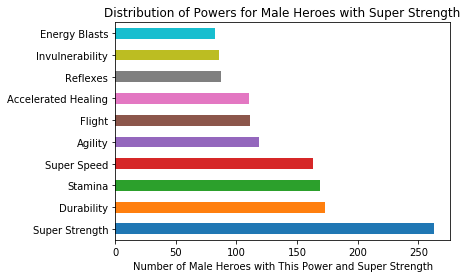

In [250]:
male_powers.loc[male_powers['Super Strength'] == 1].sum().sort_values(ascending=False)[:10].plot.barh(title='Distribution of Powers for Male Heroes with Super Strength')
plt.xlabel('Number of Male Heroes with This Power and Super Strength')

Text(0.5, 0, 'Number of Female Heroes with This Power and Super Strength')

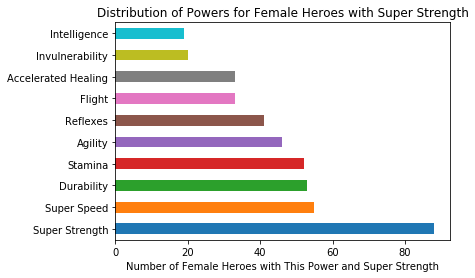

In [251]:
female_powers.loc[female_powers['Super Strength'] == 1].sum().sort_values(ascending=False)[:10].plot.barh(title='Distribution of Powers for Female Heroes with Super Strength')
plt.xlabel('Number of Female Heroes with This Power and Super Strength')

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data